# Lead Scoring Case Study

#### With the data provided we need to predict whether a lead is a potential lead or not by assigning a lead score. The higher the lead score the more chances that the lead will be converted to a payable customer

In [1247]:
# Importing the required libraries
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [1248]:
# Reading the data
leads = pd.read_csv('Leads.csv')

### Data Inspection

In [1249]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1250]:
leads.shape

(9240, 37)

In [1251]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1252]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### There are 37 rows and 9240 columns

###### Let's check if there are any duplicates IDs under Prospect ID and Lead Number

In [1253]:
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [1254]:
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

There are no duplicates under Prospect ID and Lead Number and since they just indicate only the identification number,
They can be dropped

### Exploratory Data Analysis

### Data Cleaning

In [1255]:
# As already mentioned above, Prospect Id and Lead Number can be dropped since they are 
# not significant towards the model building

In [1256]:
leads.drop(['Prospect ID','Lead Number'],1,inplace = True)

In [1257]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1258]:
# There are some columns where the value has mentioned as 'select'. Let's covert this to Nan
leads = leads.replace('Select',np.nan)

In [1259]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1260]:
# Checking the null values
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [1261]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [1262]:
# Dropping the columns which have more than 45% of missing values
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1263]:
cols = leads.columns

for i in cols:
    if((leads[i].isnull().sum()/len(leads.index)*100) >= 45):
        leads.drop(i,1,inplace = True)

In [1264]:
#checking null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [1265]:
leads.shape

(9240, 28)

##### We are left with 28 columns now

### Categorical Attribute analysis

In [1266]:
# Let's analyse the categorical variables with the higher percentage of missing values first to 
# check whether they are significant towards taget variable or can be dropped.


In [1267]:
# Let's start with the variable ' Country'

In [1268]:
# Checking the value counts for 'Country'
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [1269]:
import matplotlib.pyplot as plt
import seaborn as sns

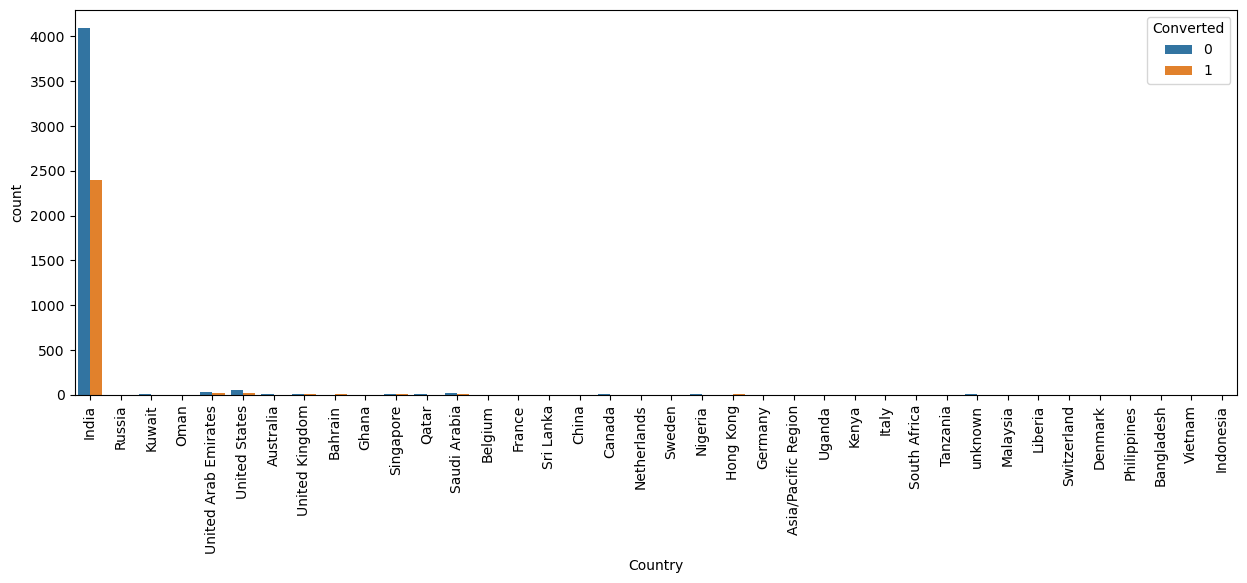

In [1270]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="Country", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1271]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

leads['Country'] = leads['Country'].replace(np.nan,'India')

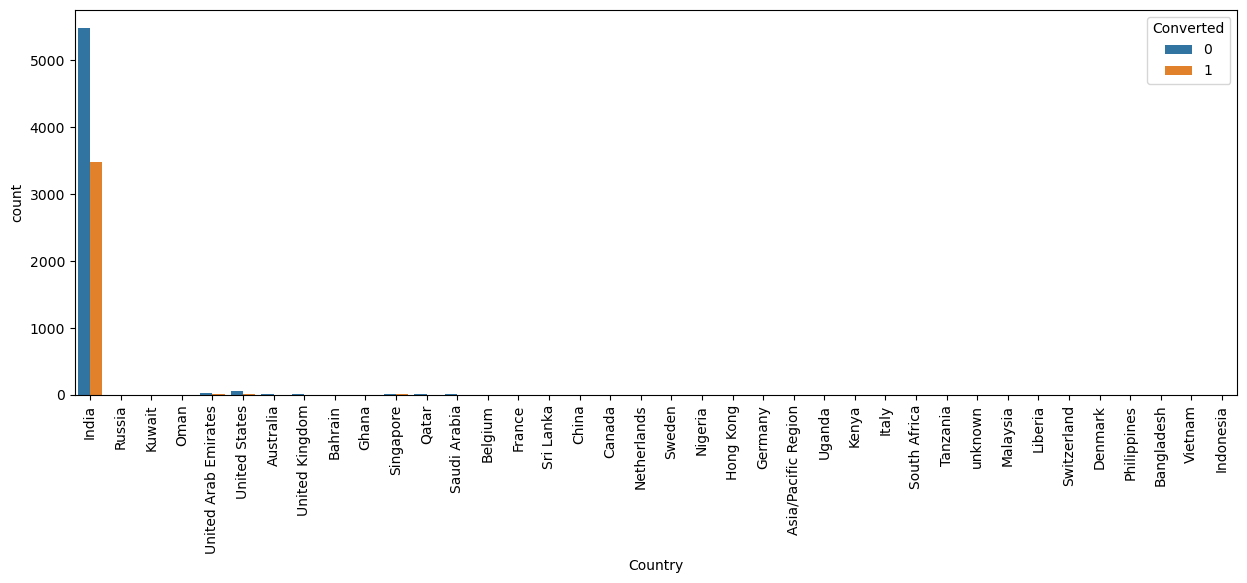

In [1272]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="Country", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### As we can see 97% of data has value as 'India', this column can be dropped 

In [1273]:
leads.drop(['Country'], 1, inplace=True)

In [1274]:
# Let's analyse the 'Specialization' column
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1275]:
# Let's replace the Nan values with 'Not Specified' since there could be reasons that lead did not fill this field
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Not Specified')

In [1276]:
leads['Specialization'].value_counts(dropna=False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

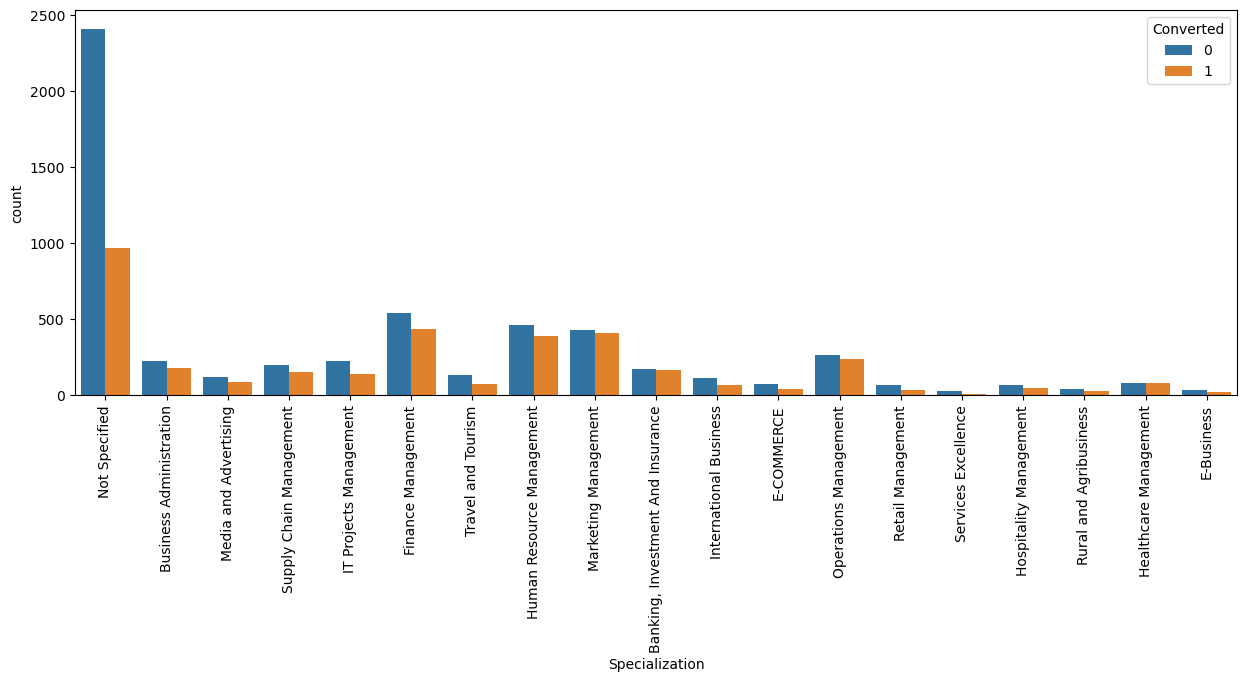

In [1277]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="Specialization", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that specialization with Management in them have higher number of leads as well as leads converted. 
So this is definitely a significant variable and should not be dropped.

In [1278]:
#Let's combine Management Specializations as they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

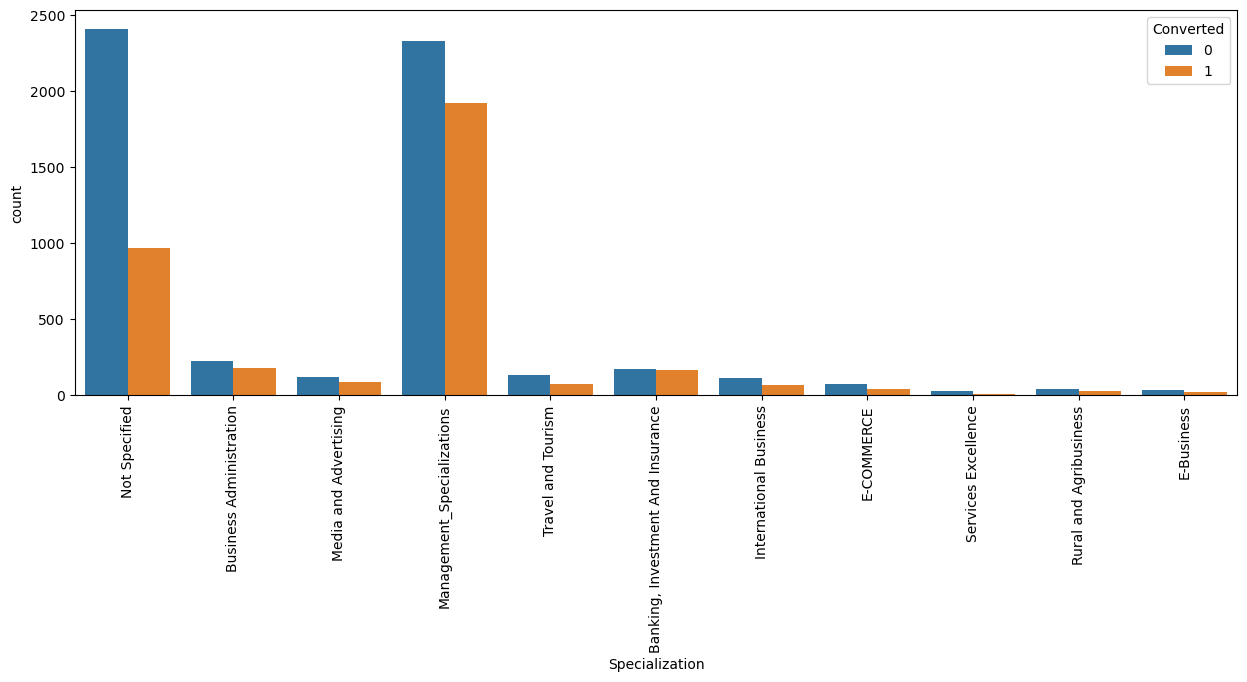

In [1279]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="Specialization", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1280]:
# Let's analyze 'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1281]:
# Since Unemployed is the most common occurence among the non-missing values we can impute all missing values with 'Unemployed'

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

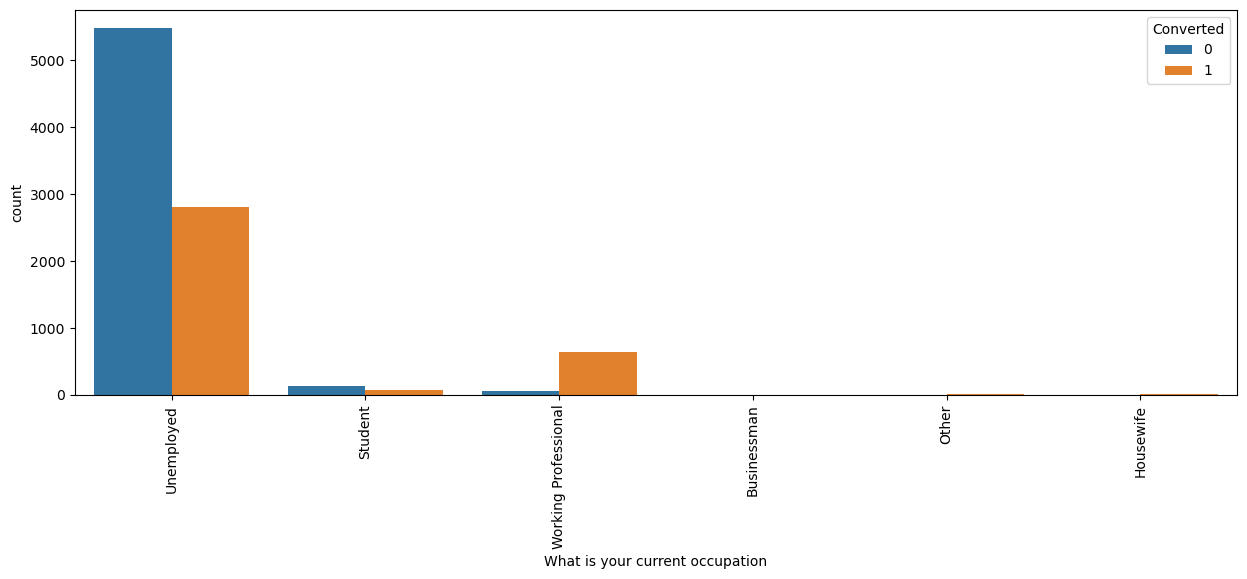

In [1282]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="What is your current occupation", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Working professionals going for the courses have high number of chances to convert compared to other occupations.
Unemployed leads are the most in terms of absolute numbers

In [1283]:
# Let's analyze 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1284]:
# Since 'Better Career Prospects' is the most common occurence among the non-missing values we can impute all missing values with 'same

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

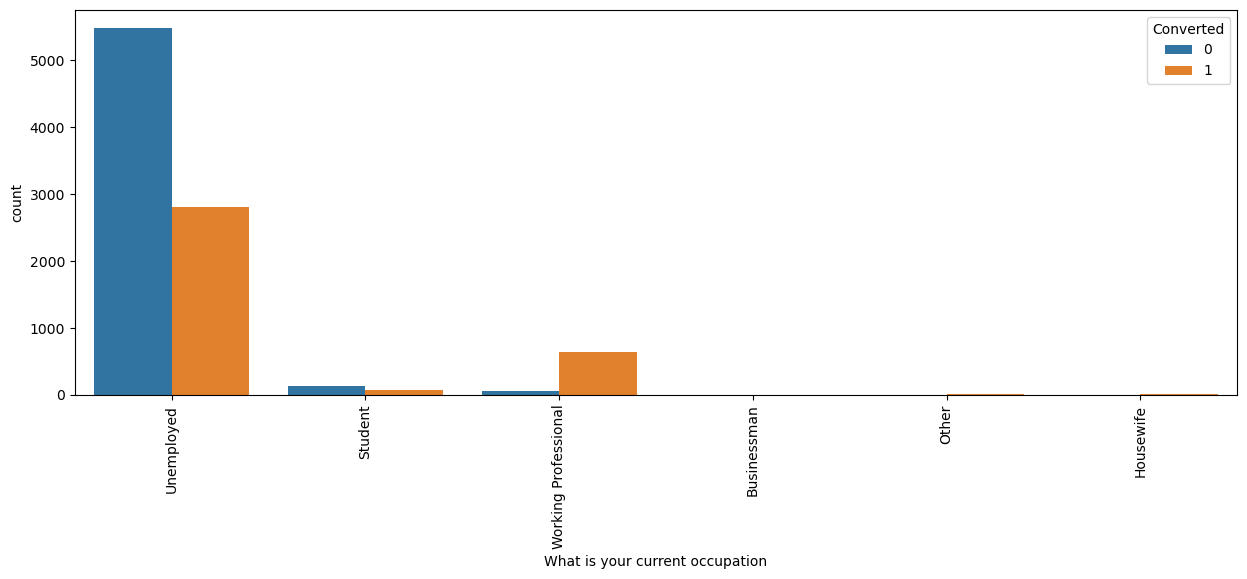

In [1285]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="What is your current occupation", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### As we can see more than 99% of the data is under a single category, this attribute is worth dropped 

In [1286]:
leads.drop(['What matters most to you in choosing a course'], 1, inplace=True)

In [1287]:
# Let's analyze 'Tags' column
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [1288]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

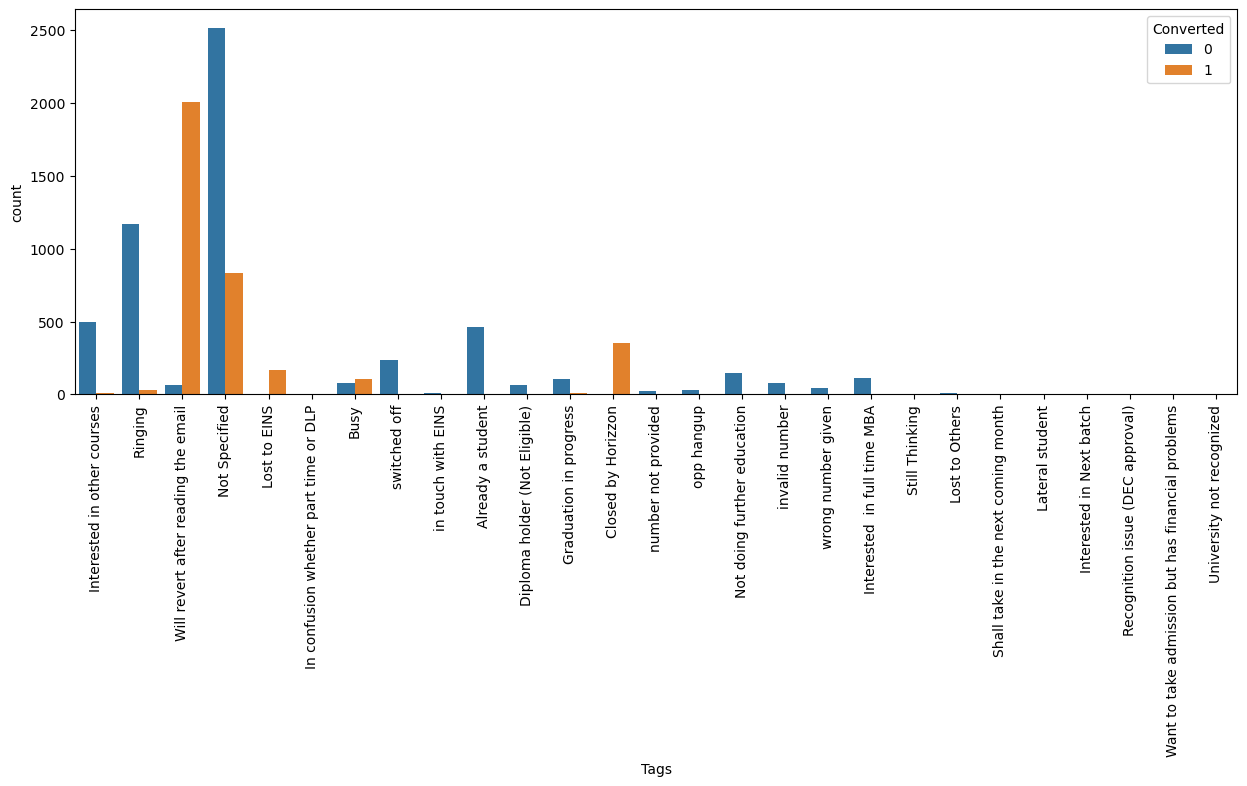

In [1289]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="Tags", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## here we see that tag column is filled by the analysis team after making the call, it does not make sense to use it for model building hence we will drop this field

In [1290]:
leads.drop(['Tags'], 1, inplace=True)

In [1291]:
# Let's analyze 'City' column
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1292]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

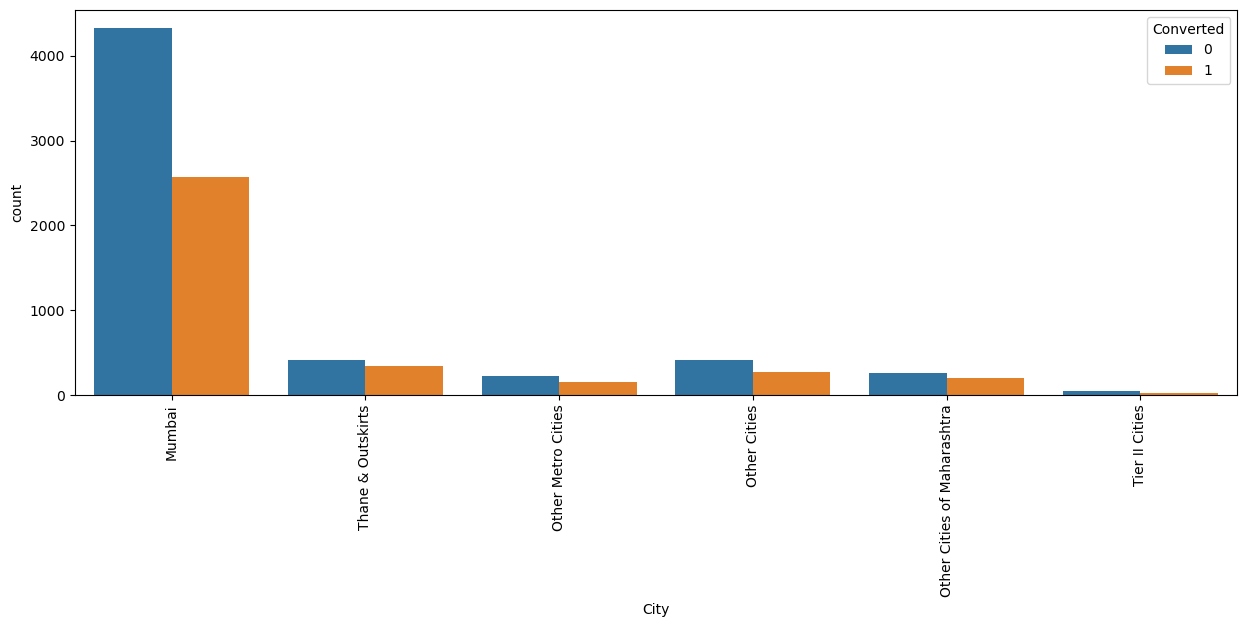

In [1293]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="City", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can see from the above plot that this field is providing some insights towards the target variable, let's keep this 
variable for further analysis

In [1294]:
#checking null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [1295]:
# Let's check 'Lead Source' column
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

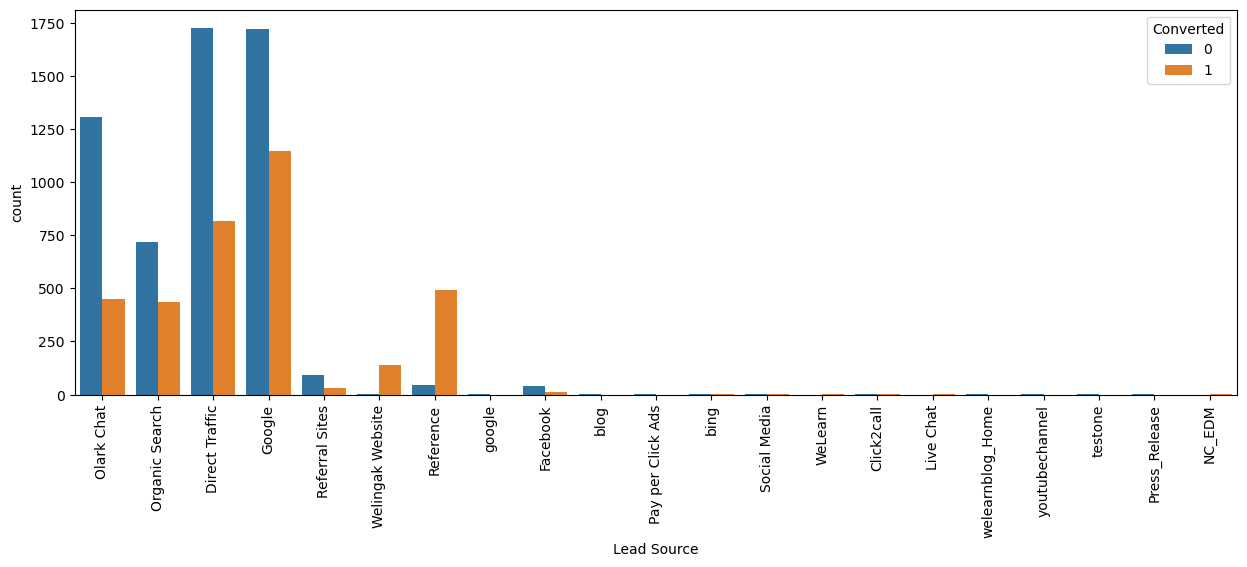

In [1296]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="Lead Source", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we see there are some variables with low frequencies, We can group some of the lower frequency occuring labels under a common label 'Others' including Nan

In [1297]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')    

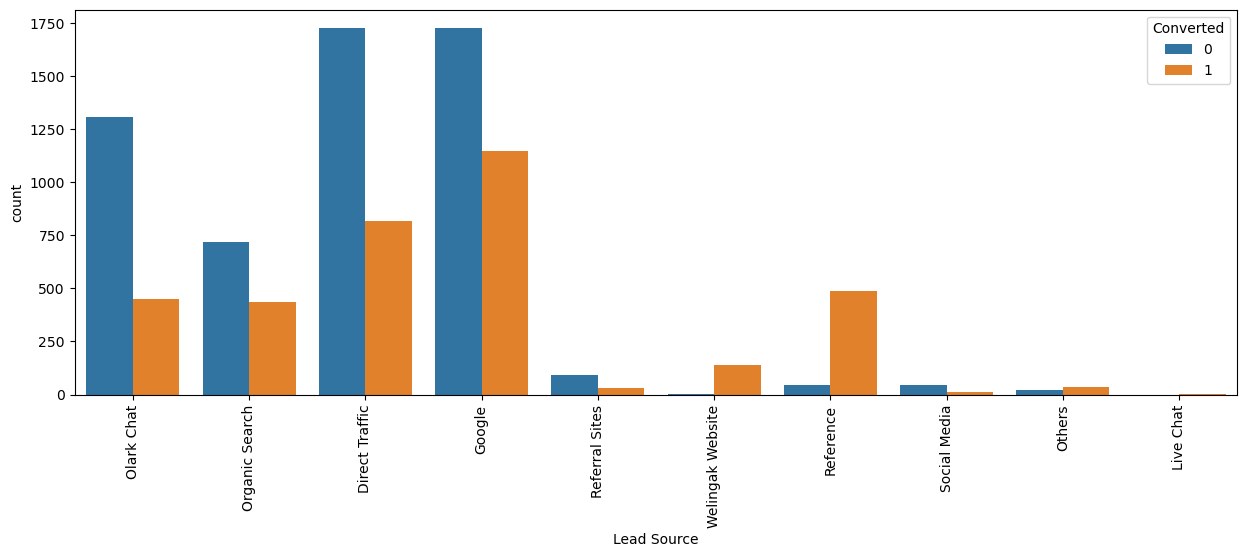

In [1298]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="Lead Source", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Inference
Maximum number of leads are generated by Google and Direct traffic.

Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [1299]:
# Let's check 'Last Activity' column
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1300]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [1301]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [1302]:
#Checking the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

The numeric variables 'Total Visits' and 'Page Views Per Visit' have less than 2% of null values. Hence we can delete the null records as it is not going to effect much to our model.

In [1303]:
leads = leads.dropna()

In [1304]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [1305]:
# Let's analyse Lead Origin 
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

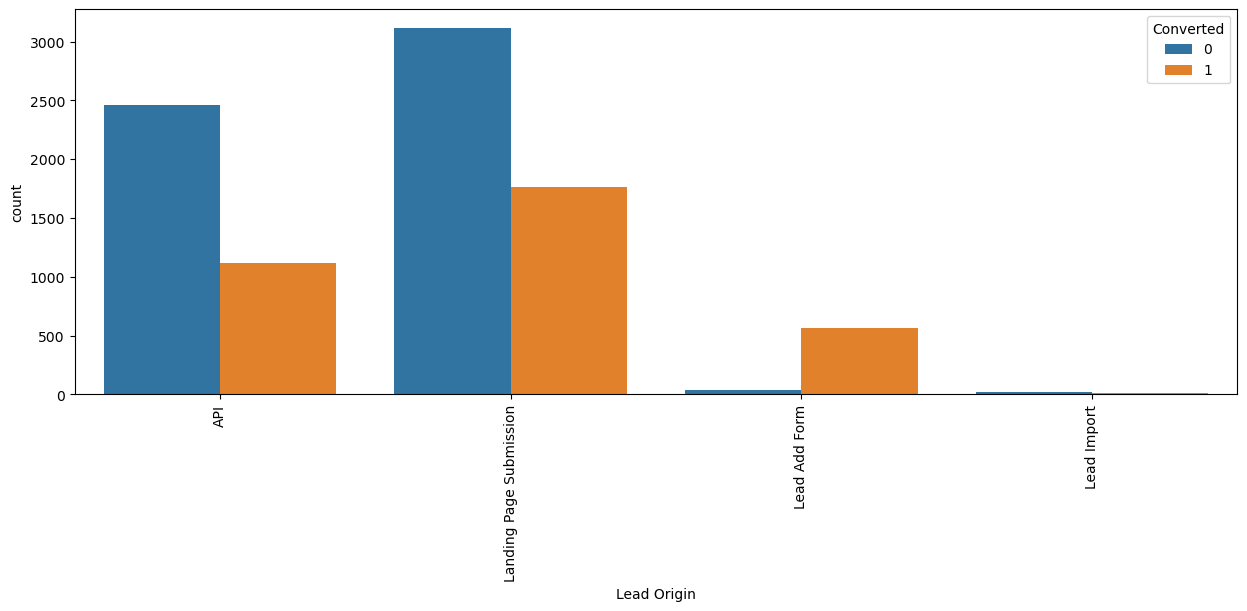

In [1306]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="Lead Origin", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

API and Landing Page Submission got high number of leads 

The conversion rate is pretty good in case of Lead Add Form

We need to concentrate on API and Landing Page Submisiion to increase the conversion rate

In [1307]:
# Let's analyse 'Do Not Email'  
leads['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

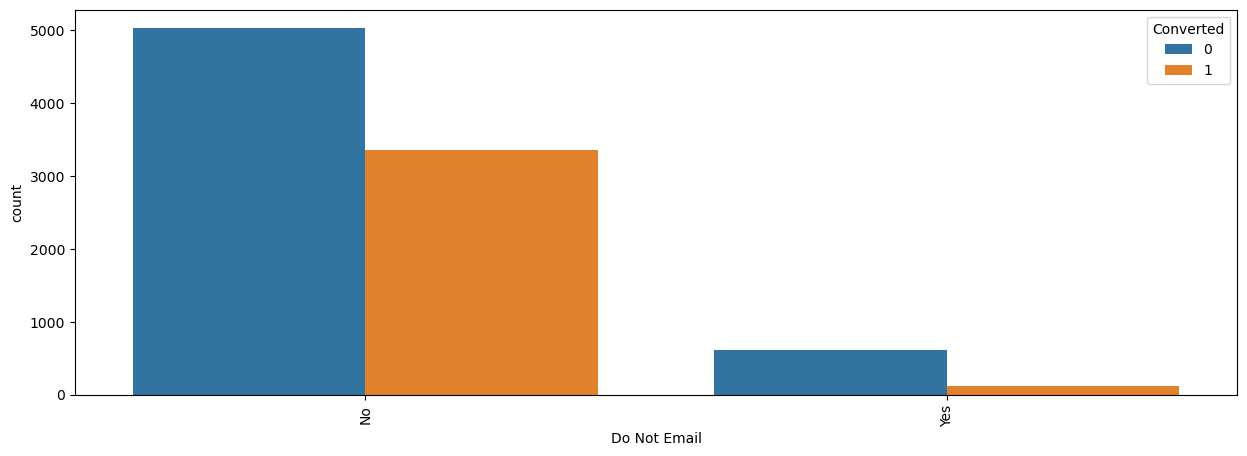

In [1308]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="Do Not Email", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1309]:
# Let's analyse 'Do Not Call'  
leads['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

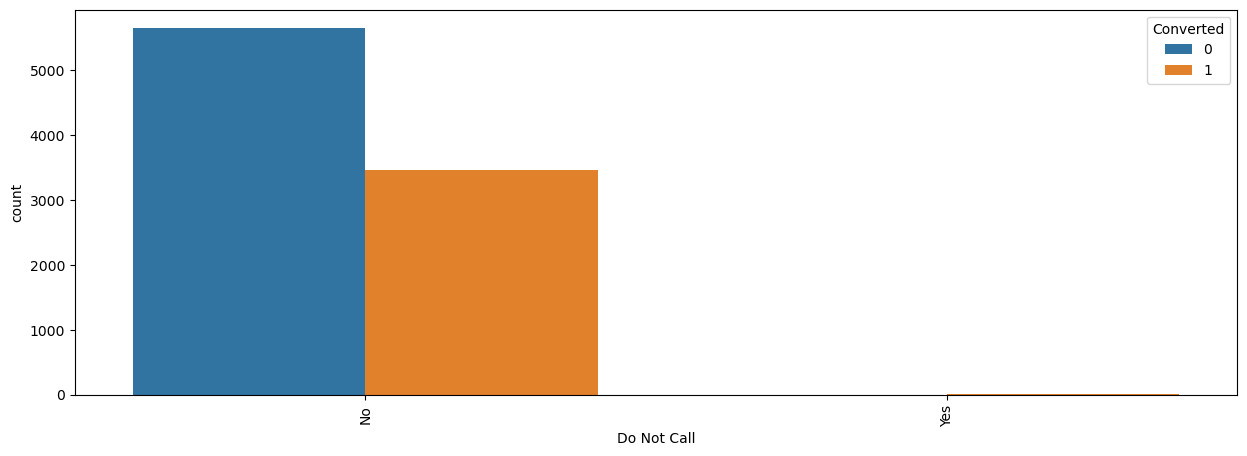

In [1310]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="Do Not Call", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Since more than 90% of the data has one value, this column can be dropped.

In [1311]:
leads.drop(['Do Not Call'], 1, inplace=True)

In [1312]:
#Search 
leads['Search'].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [1313]:
#Magazine
leads['Magazine'].value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [1314]:
#Newspaper Article
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [1315]:
#X Education Forums
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [1316]:
#Newspaper
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [1317]:
#Digital Advertisement
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [1318]:
#Through Recommendations
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [1319]:
#Receive More Updates About Our Courses
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [1320]:
#Update me on Supply Chain Content
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [1321]:
#Get updates on DM Content
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [1322]:
#I agree to pay the amount through cheque
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [1323]:
#A free copy of Mastering The Interview
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

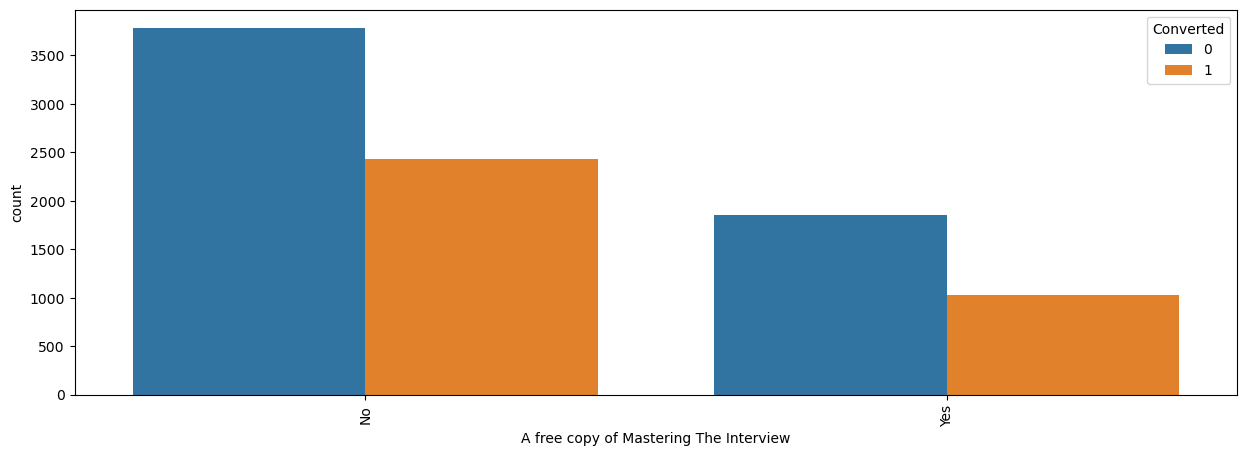

In [1324]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x="A free copy of Mastering The Interview", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### All the variables below have more than 90% of data with same value. Hence we can drop the below columns.
    
Search                                     
Magazine                                   
Newspaper Article                       
X Education Forums                         
Newspaper                                  
Digital Advertisement                      
Through Recommendations                     
Receive More Updates About Our Courses      
Update me on Supply Chain Content           
Get updates on DM Content                  
I agree to pay the amount through cheque    

In [1325]:
leads.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'],1, inplace=True)

In [1326]:
#last Notable Activity
leads['Last Notable Activity'].value_counts(dropna = False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [1327]:
#combining lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

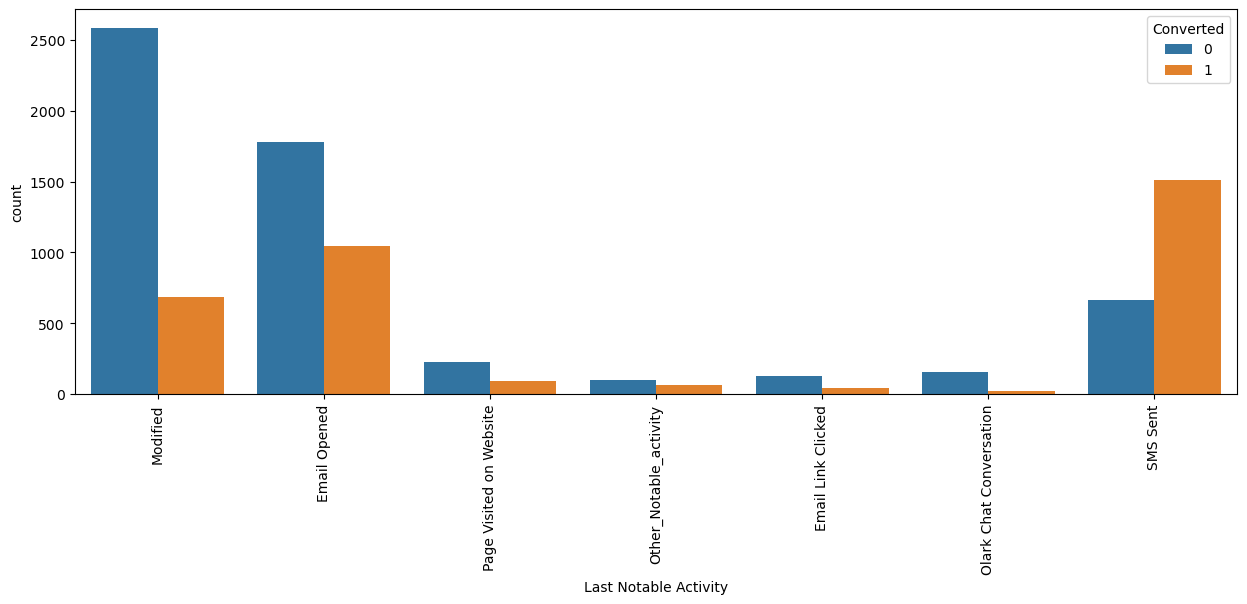

In [1328]:
# Let's check the relation with the target variable
plt.figure(figsize=(15,5))
s1=sns.countplot(data=leads, x='Last Notable Activity', hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1329]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  City                                    9103 non-null   obje

### Numerical Attribute Analysis

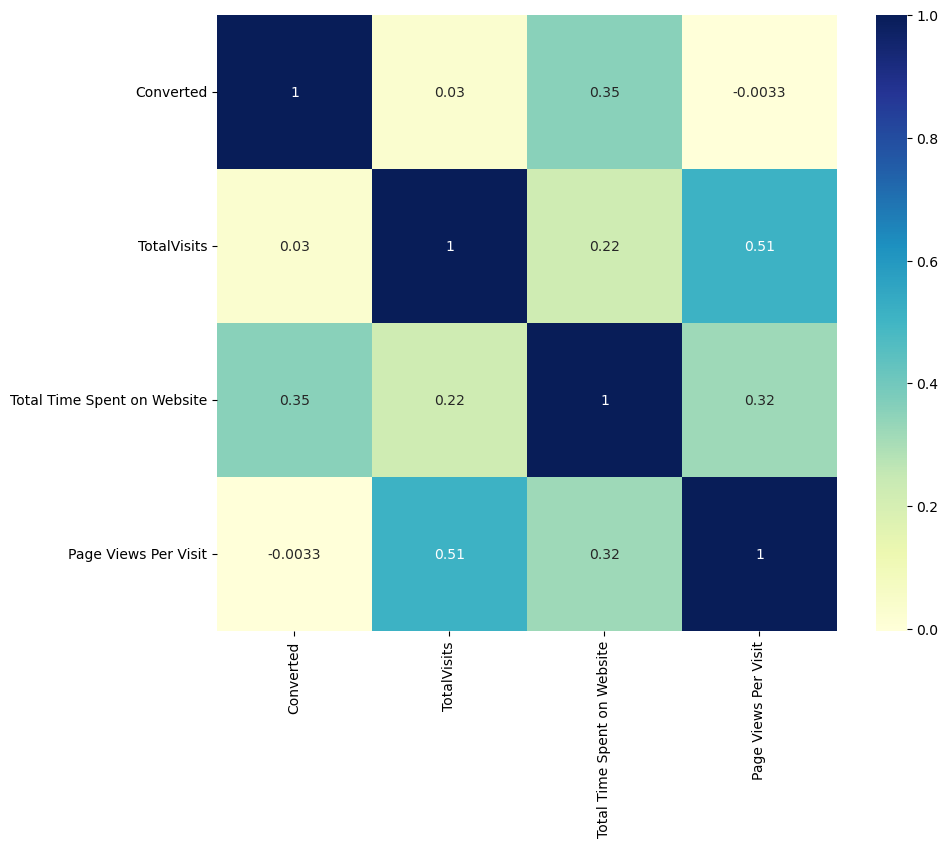

In [1330]:
# Let's check the correlation of numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

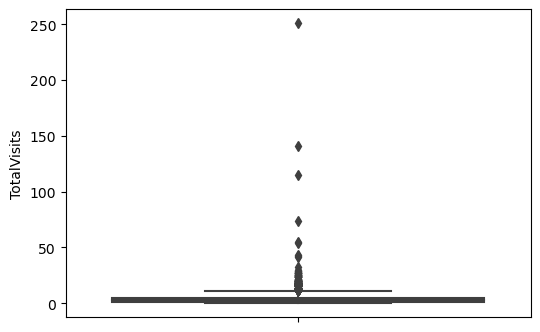

In [1331]:
# Let's analyse 'TotalVisits'
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

###### We can see presence of outliers in the above plot

In [1332]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

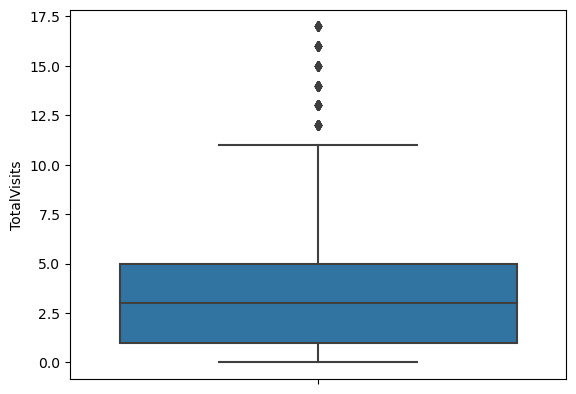

In [1333]:
# Let's remove the top & bottom 1% of the Column Outlier values
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

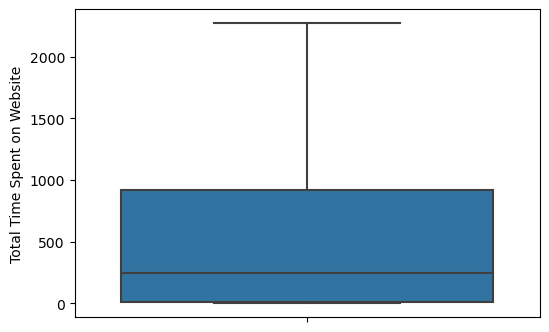

In [1334]:
# Let's analyse "Total Time Spent on Website"
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

###### There are no major outliers found

In [1335]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

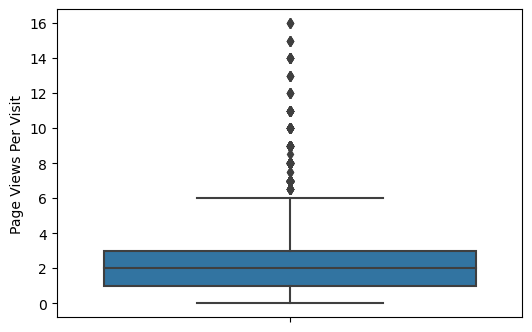

In [1336]:
# Let us analyse "Page Views Per Visit"
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

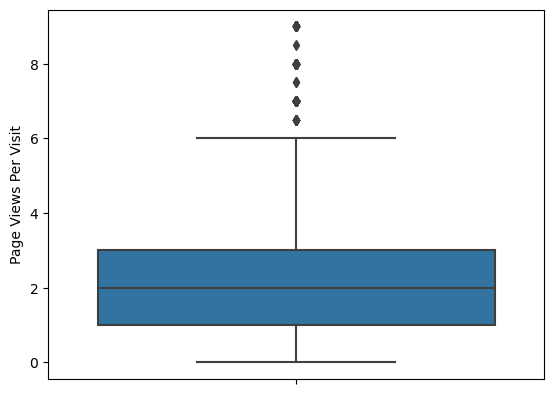

In [1337]:
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [1338]:
#Checking the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.92025019546521

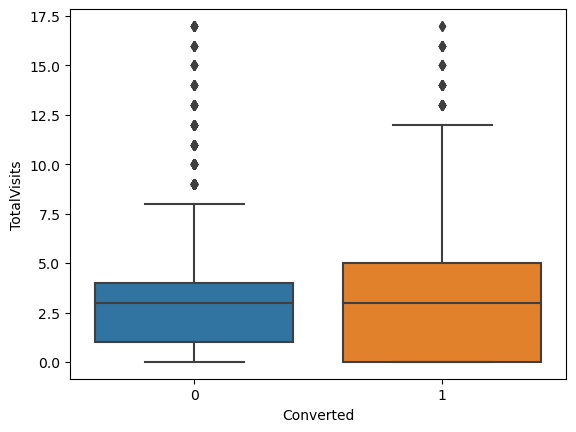

In [1339]:
# TotalVisits vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

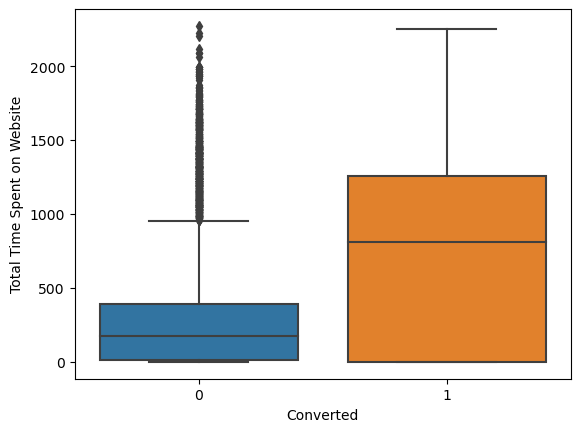

In [1340]:
#"Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Median for converted and not converted leads are the close. Nothng conclusive can be said on the basis of Total Visits
Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

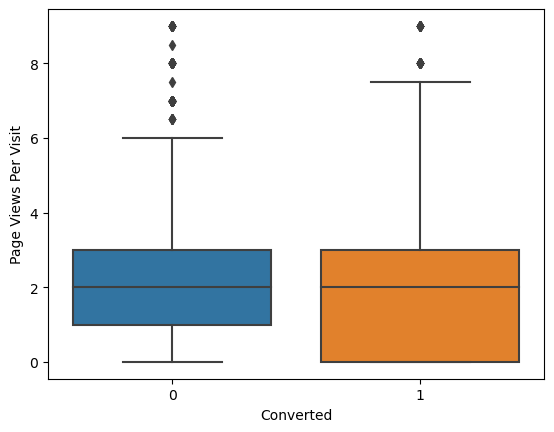

In [1341]:
# "Page Views Per Visit" vs Converted variable
sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

Median for converted and unconverted leads is the same.Nothing conclusive can be said for lead conversion from Page Views Per Visit

### Dummy Variable Creation

In [1342]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1343]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [1344]:
# getting dummies
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1345]:
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [1346]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [1347]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [1348]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [1349]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [1350]:
# getting dummies
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1351]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,1,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,1,0,0,0


In [1352]:
#dropping the original columns after dummy variable creation

leads.drop('Lead Origin',1,inplace = True)
leads.drop('Lead Source',1,inplace = True)
leads.drop('Do Not Email',1,inplace = True)
leads.drop('Last Activity',1,inplace = True)
leads.drop('Specialization',1,inplace = True)
leads.drop('What is your current occupation',1,inplace = True)
leads.drop('A free copy of Mastering The Interview',1,inplace = True)
leads.drop('City',1,inplace = True)
leads.drop('Last Notable Activity',1,inplace = True)

In [1353]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Splitting data and building logistic regression model

In [1354]:
# Now let's do the splitting of data and build a logistic regression model

In [1355]:

from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [1356]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1357]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [1358]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Model Building using Stats Model & RFE:

In [1359]:
import statsmodels.api as sm

In [1360]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [1361]:
rfe.support_

array([False,  True, False, False,  True, False,  True, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True, False, False,
        True,  True, False, False])

In [1362]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 4),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 25),
 ('City_Other Cities of Maharashtra', False, 28),
 ('City_Other Metro Cities', False, 30),
 ('City_Thane & Outskirts', False, 29),
 ('City_Tier II Cities', False, 27),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 5),
 ('Specialization_E-Business', False, 6),
 ('Specialization_E-COMMERCE', False, 2),
 ('Specialization_International Business', True, 1),
 ('Sp

In [1363]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Rural and Agribusiness', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [1364]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Other', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Ac

#### Model 1

In [1365]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.6
Date:                Tue, 19 Sep 2023   Deviance:                       5247.3
Time:                        09:54:28   Pearson chi2:                 6.55e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3882
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5708      0.631      0.904      0.366      -0.667       1.808
Total Time Spent on Website                              1.0827      0.040     27.148      0.000       1.004       1.161
Lead Origin_Lead Add Form                                2.8349      0.250     11.357      0.000       2.346       3.324
What is your current occupation_Housewife               22.4585   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
What is your current occupation_Student                 -0.4118      0.670     -0.615      0.539      -1.725       0.901
What is your current occupation_Unemployed              -0.6988      0.627     -1.115      0.265      -1.927       0.530
What is your current occupation_Working Professional     2.0547      0.655      3.136      0.002       0.771       3.339
Specialization_Banking, Investment And Insurance         0.7113      0.189      3.773      0.000       0.342       1.081
Specialization_International Business                    0.4782      0.240      1.990      0.047       0.007       0.949
Specialization_Management_Specializations                0.3907      0.081      4.825      0.000       0.232       0.549
Specialization_Rural and Agribusiness                    0.7892      0.375      2.106      0.035       0.055       1.524
Lead Source_Direct Traffic                              -1.7217      0.125    -13.801      0.000      -1.966      -1.477
Lead Source_Google                                      -1.1816      0.115    -10.300      0.000      -1.406      -0.957
Lead Source_Organic Search                              -1.2855      0.136     -9.457      0.000      -1.552      -1.019
Lead Source_Referral Sites                              -1.3514      0.338     -3.997      0.000      -2.014      -0.689
Lead Source_Welingak Website                             2.4996      1.041      2.401      0.016       0.459       4.540
Last Activity_Email Bounced                             -1.3860      0.323     -4.295      0.000      -2.019      -0.754
Last Activity_Olark Chat Conversation                   -0.8922      0.196     -4.558      0.000      -1.276      -0.509
Last Activity_SMS Sent                                   1.2240      0.075     16.393      0.000       1.078       1.370
Last Notable Activity_Modified                          -0.8449      0.083    -10.168      0.000      -1.008      -0.682
Last Notable Activity_Olark Chat Conversation           -1.1770      0.425     -2.772      0.006      -2.009      -0.345
========================================================================================================================
"""

By looking at the P values, we can observe that the p value for What is your current occupation_Housewife is high. 
So let's drop this column

In [1366]:
col = col.drop('What is your current occupation_Housewife',1)

#### Model 2

In [1367]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.3
Date:                Tue, 19 Sep 2023   Deviance:                       5252.5
Time:                        09:54:29   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1477      0.565      2.033      0.042       0.041       2.254
Total Time Spent on Website                              1.0808      0.040     27.133      0.000       1.003       1.159
Lead Origin_Lead Add Form                                2.8379      0.250     11.372      0.000       2.349       3.327
What is your current occupation_Student                 -0.9892      0.607     -1.630      0.103      -2.179       0.200
What is your current occupation_Unemployed              -1.2773      0.559     -2.285      0.022      -2.373      -0.182
What is your current occupation_Working Professional     1.4764      0.590      2.501      0.012       0.319       2.634
Specialization_Banking, Investment And Insurance         0.7107      0.188      3.771      0.000       0.341       1.080
Specialization_International Business                    0.4779      0.240      1.989      0.047       0.007       0.949
Specialization_Management_Specializations                0.3897      0.081      4.818      0.000       0.231       0.548
Specialization_Rural and Agribusiness                    0.7863      0.375      2.099      0.036       0.052       1.521
Lead Source_Direct Traffic                              -1.7222      0.125    -13.806      0.000      -1.967      -1.478
Lead Source_Google                                      -1.1770      0.115    -10.267      0.000      -1.402      -0.952
Lead Source_Organic Search                              -1.2760      0.136     -9.405      0.000      -1.542      -1.010
Lead Source_Referral Sites                              -1.3485      0.338     -3.990      0.000      -2.011      -0.686
Lead Source_Welingak Website                             2.4968      1.041      2.399      0.016       0.457       4.537
Last Activity_Email Bounced                             -1.3861      0.323     -4.295      0.000      -2.019      -0.754
Last Activity_Olark Chat Conversation                   -0.8991      0.196     -4.592      0.000      -1.283      -0.515
Last Activity_SMS Sent                                   1.2233      0.075     16.389      0.000       1.077       1.370
Last Notable Activity_Modified                          -0.8446      0.083    -10.171      0.000      -1.007      -0.682
Last Notable Activity_Olark Chat Conversation           -1.1691      0.425     -2.754      0.006      -2.001      -0.337
========================================================================================================================
"""

## We can remove What is your current occupation_Student	 based on P value

In [1368]:
col = col.drop('What is your current occupation_Student',1)

## Model 3

In [1369]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.6
Date:                Tue, 19 Sep 2023   Deviance:                       5255.2
Time:                        09:54:29   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3875
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3110      0.233      1.338      0.181      -0.145       0.767
Total Time Spent on Website                              1.0819      0.040     27.165      0.000       1.004       1.160
Lead Origin_Lead Add Form                                2.8440      0.249     11.399      0.000       2.355       3.333
What is your current occupation_Unemployed              -0.4424      0.222     -1.995      0.046      -0.877      -0.008
What is your current occupation_Working Professional     2.3101      0.294      7.868      0.000       1.735       2.885
Specialization_Banking, Investment And Insurance         0.7059      0.188      3.746      0.000       0.337       1.075
Specialization_International Business                    0.4735      0.240      1.970      0.049       0.002       0.945
Specialization_Management_Specializations                0.3909      0.081      4.833      0.000       0.232       0.549
Specialization_Rural and Agribusiness                    0.7697      0.375      2.053      0.040       0.035       1.505
Lead Source_Direct Traffic                              -1.7196      0.125    -13.793      0.000      -1.964      -1.475
Lead Source_Google                                      -1.1765      0.115    -10.266      0.000      -1.401      -0.952
Lead Source_Organic Search                              -1.2717      0.136     -9.376      0.000      -1.538      -1.006
Lead Source_Referral Sites                              -1.3478      0.338     -3.987      0.000      -2.010      -0.685
Lead Source_Welingak Website                             2.4936      1.041      2.396      0.017       0.453       4.534
Last Activity_Email Bounced                             -1.3935      0.323     -4.319      0.000      -2.026      -0.761
Last Activity_Olark Chat Conversation                   -0.8988      0.196     -4.593      0.000      -1.282      -0.515
Last Activity_SMS Sent                                   1.2212      0.075     16.359      0.000       1.075       1.367
Last Notable Activity_Modified                          -0.8415      0.083    -10.144      0.000      -1.004      -0.679
Last Notable Activity_Olark Chat Conversation           -1.1773      0.425     -2.773      0.006      -2.009      -0.345
========================================================================================================================
"""

Lets look into VIFs as well

In [1370]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1371]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Unemployed,6.78
9,Lead Source_Google,3.32
8,Lead Source_Direct Traffic,3.27
6,Specialization_Management_Specializations,2.61
16,Last Notable Activity_Modified,2.05
14,Last Activity_Olark Chat Conversation,1.92
1,Lead Origin_Lead Add Form,1.85
10,Lead Source_Organic Search,1.84
3,What is your current occupation_Working Profes...,1.62
15,Last Activity_SMS Sent,1.62


 'What is your current occupation_Unemployed' has the higher VIF value. Let's drop this column

In [1372]:
col = col.drop('What is your current occupation_Unemployed',1)

#### Model 4

In [1373]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.5
Date:                Tue, 19 Sep 2023   Deviance:                       5259.1
Time:                        09:54:30   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3871
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1157      0.092     -1.260      0.208      -0.296       0.064
Total Time Spent on Website                              1.0828      0.040     27.185      0.000       1.005       1.161
Lead Origin_Lead Add Form                                2.8600      0.250     11.462      0.000       2.371       3.349
What is your current occupation_Working Professional     2.7405      0.200     13.736      0.000       2.349       3.132
Specialization_Banking, Investment And Insurance         0.7080      0.188      3.759      0.000       0.339       1.077
Specialization_International Business                    0.4748      0.240      1.977      0.048       0.004       0.945
Specialization_Management_Specializations                0.3898      0.081      4.820      0.000       0.231       0.548
Specialization_Rural and Agribusiness                    0.8022      0.373      2.148      0.032       0.070       1.534
Lead Source_Direct Traffic                              -1.7166      0.125    -13.771      0.000      -1.961      -1.472
Lead Source_Google                                      -1.1814      0.115    -10.310      0.000      -1.406      -0.957
Lead Source_Organic Search                              -1.2769      0.136     -9.420      0.000      -1.543      -1.011
Lead Source_Referral Sites                              -1.3624      0.338     -4.033      0.000      -2.025      -0.700
Lead Source_Welingak Website                             2.4666      1.041      2.370      0.018       0.427       4.506
Last Activity_Email Bounced                             -1.3953      0.323     -4.324      0.000      -2.028      -0.763
Last Activity_Olark Chat Conversation                   -0.8920      0.196     -4.561      0.000      -1.275      -0.509
Last Activity_SMS Sent                                   1.2114      0.074     16.280      0.000       1.066       1.357
Last Notable Activity_Modified                          -0.8422      0.083    -10.156      0.000      -1.005      -0.680
Last Notable Activity_Olark Chat Conversation           -1.1758      0.425     -2.768      0.006      -2.008      -0.343
========================================================================================================================
"""

In [1374]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Specialization_Management_Specializations,2.54
7,Lead Source_Direct Traffic,2.19
15,Last Notable Activity_Modified,1.97
8,Lead Source_Google,1.96
13,Last Activity_Olark Chat Conversation,1.75
1,Lead Origin_Lead Add Form,1.67
14,Last Activity_SMS Sent,1.48
11,Lead Source_Welingak Website,1.33
16,Last Notable Activity_Olark Chat Conversation,1.33
9,Lead Source_Organic Search,1.30


In [1375]:
col = col.drop('Specialization_Management_Specializations',1)

## Model 5

In [1376]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.2
Date:                Tue, 19 Sep 2023   Deviance:                       5282.4
Time:                        09:54:31   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3848
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0380      0.090     -0.424      0.672      -0.214       0.138
Total Time Spent on Website                              1.0933      0.040     27.526      0.000       1.015       1.171
Lead Origin_Lead Add Form                                3.0131      0.248     12.148      0.000       2.527       3.499
What is your current occupation_Working Professional     2.8072      0.197     14.218      0.000       2.420       3.194
Specialization_Banking, Investment And Insurance         0.4715      0.182      2.593      0.010       0.115       0.828
Specialization_International Business                    0.2348      0.234      1.002      0.316      -0.225       0.694
Specialization_Rural and Agribusiness                    0.5918      0.370      1.600      0.110      -0.133       1.317
Lead Source_Direct Traffic                              -1.4982      0.115    -13.074      0.000      -1.723      -1.274
Lead Source_Google                                      -1.0298      0.109     -9.466      0.000      -1.243      -0.817
Lead Source_Organic Search                              -1.1724      0.133     -8.830      0.000      -1.433      -0.912
Lead Source_Referral Sites                              -1.3631      0.337     -4.044      0.000      -2.024      -0.702
Lead Source_Welingak Website                             2.2969      1.040      2.208      0.027       0.258       4.335
Last Activity_Email Bounced                             -1.4029      0.322     -4.355      0.000      -2.034      -0.772
Last Activity_Olark Chat Conversation                   -0.9443      0.195     -4.852      0.000      -1.326      -0.563
Last Activity_SMS Sent                                   1.1933      0.074     16.099      0.000       1.048       1.339
Last Notable Activity_Modified                          -0.8520      0.083    -10.305      0.000      -1.014      -0.690
Last Notable Activity_Olark Chat Conversation           -1.1687      0.420     -2.783      0.005      -1.992      -0.346
========================================================================================================================
"""

In [1377]:
# removing Specialization_International Business 


In [1378]:
col = col.drop('Specialization_International Business',1)

## Model 6

In [1379]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.7
Date:                Tue, 19 Sep 2023   Deviance:                       5283.4
Time:                        09:54:32   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3847
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0369      0.090     -0.411      0.681      -0.213       0.139
Total Time Spent on Website                              1.0926      0.040     27.526      0.000       1.015       1.170
Lead Origin_Lead Add Form                                3.0149      0.248     12.153      0.000       2.529       3.501
What is your current occupation_Working Professional     2.8039      0.197     14.208      0.000       2.417       3.191
Specialization_Banking, Investment And Insurance         0.4646      0.182      2.557      0.011       0.109       0.821
Specialization_Rural and Agribusiness                    0.5854      0.370      1.583      0.113      -0.139       1.310
Lead Source_Direct Traffic                              -1.4898      0.114    -13.042      0.000      -1.714      -1.266
Lead Source_Google                                      -1.0247      0.109     -9.433      0.000      -1.238      -0.812
Lead Source_Organic Search                              -1.1674      0.133     -8.803      0.000      -1.427      -0.907
Lead Source_Referral Sites                              -1.3618      0.337     -4.042      0.000      -2.022      -0.702
Lead Source_Welingak Website                             2.2942      1.040      2.206      0.027       0.256       4.333
Last Activity_Email Bounced                             -1.4056      0.322     -4.363      0.000      -2.037      -0.774
Last Activity_Olark Chat Conversation                   -0.9443      0.195     -4.853      0.000      -1.326      -0.563
Last Activity_SMS Sent                                   1.1938      0.074     16.107      0.000       1.049       1.339
Last Notable Activity_Modified                          -0.8535      0.083    -10.327      0.000      -1.016      -0.692
Last Notable Activity_Olark Chat Conversation           -1.1712      0.420     -2.789      0.005      -1.994      -0.348
========================================================================================================================
"""

In [1380]:
# removing Specialization_International Business 
col = col.drop('Specialization_Rural and Agribusiness',1)

## Model 7

In [1381]:
X_train_sm = sm.add_constant(X_train[col])
logm7= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.9
Date:                Tue, 19 Sep 2023   Deviance:                       5285.8
Time:                        09:54:32   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3844
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0332      0.090     -0.371      0.711      -0.209       0.142
Total Time Spent on Website                              1.0917      0.040     27.522      0.000       1.014       1.169
Lead Origin_Lead Add Form                                3.0125      0.248     12.145      0.000       2.526       3.499
What is your current occupation_Working Professional     2.7984      0.197     14.187      0.000       2.412       3.185
Specialization_Banking, Investment And Insurance         0.4589      0.182      2.528      0.011       0.103       0.815
Lead Source_Direct Traffic                              -1.4852      0.114    -13.010      0.000      -1.709      -1.261
Lead Source_Google                                      -1.0236      0.109     -9.427      0.000      -1.236      -0.811
Lead Source_Organic Search                              -1.1518      0.132     -8.718      0.000      -1.411      -0.893
Lead Source_Referral Sites                              -1.3636      0.337     -4.049      0.000      -2.024      -0.704
Lead Source_Welingak Website                             2.2940      1.040      2.206      0.027       0.256       4.333
Last Activity_Email Bounced                             -1.4033      0.322     -4.353      0.000      -2.035      -0.771
Last Activity_Olark Chat Conversation                   -0.9471      0.195     -4.867      0.000      -1.328      -0.566
Last Activity_SMS Sent                                   1.1901      0.074     16.075      0.000       1.045       1.335
Last Notable Activity_Modified                          -0.8552      0.083    -10.351      0.000      -1.017      -0.693
Last Notable Activity_Olark Chat Conversation           -1.1726      0.420     -2.793      0.005      -1.995      -0.350
========================================================================================================================
"""

In [1382]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.97
10,Last Activity_Olark Chat Conversation,1.74
1,Lead Origin_Lead Add Form,1.56
11,Last Activity_SMS Sent,1.48
5,Lead Source_Google,1.47
4,Lead Source_Direct Traffic,1.39
13,Last Notable Activity_Olark Chat Conversation,1.33
8,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.20
6,Lead Source_Organic Search,1.18


In [1383]:
col = col.drop('Last Notable Activity_Modified',1)

In [1384]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.55
11,Last Activity_SMS Sent,1.48
8,Lead Source_Welingak Website,1.32
10,Last Activity_Olark Chat Conversation,1.31
5,Lead Source_Google,1.26
4,Lead Source_Direct Traffic,1.23
12,Last Notable Activity_Olark Chat Conversation,1.22
0,Total Time Spent on Website,1.18
2,What is your current occupation_Working Profes...,1.16
6,Lead Source_Organic Search,1.10


## Model 8

In [1385]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.3
Date:                Tue, 19 Sep 2023   Deviance:                       5398.6
Time:                        09:54:33   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3733
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2316      0.087     -2.661      0.008      -0.402      -0.061
Total Time Spent on Website                              1.0942      0.039     27.949      0.000       1.017       1.171
Lead Origin_Lead Add Form                                2.9274      0.245     11.933      0.000       2.447       3.408
What is your current occupation_Working Professional     2.8085      0.195     14.426      0.000       2.427       3.190
Specialization_Banking, Investment And Insurance         0.4822      0.177      2.723      0.006       0.135       0.829
Lead Source_Direct Traffic                              -1.5317      0.113    -13.515      0.000      -1.754      -1.310
Lead Source_Google                                      -1.1072      0.107    -10.305      0.000      -1.318      -0.897
Lead Source_Organic Search                              -1.2093      0.130     -9.274      0.000      -1.465      -0.954
Lead Source_Referral Sites                              -1.4609      0.333     -4.381      0.000      -2.115      -0.807
Lead Source_Welingak Website                             2.3593      1.041      2.266      0.023       0.319       4.400
Last Activity_Email Bounced                             -1.7115      0.317     -5.407      0.000      -2.332      -1.091
Last Activity_Olark Chat Conversation                   -1.5786      0.184     -8.595      0.000      -1.939      -1.219
Last Activity_SMS Sent                                   1.2548      0.073     17.206      0.000       1.112       1.398
Last Notable Activity_Olark Chat Conversation           -0.3182      0.411     -0.774      0.439      -1.124       0.488
========================================================================================================================
"""

In [1386]:
col = col.drop('Last Notable Activity_Olark Chat Conversation',1)

In [1387]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.55
11,Last Activity_SMS Sent,1.48
8,Lead Source_Welingak Website,1.32
5,Lead Source_Google,1.26
4,Lead Source_Direct Traffic,1.23
0,Total Time Spent on Website,1.18
2,What is your current occupation_Working Profes...,1.16
6,Lead Source_Organic Search,1.10
10,Last Activity_Olark Chat Conversation,1.08
9,Last Activity_Email Bounced,1.06


In [1388]:
col = col.drop('Lead Origin_Lead Add Form',1)

## Model 9

In [1389]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2814.5
Date:                Tue, 19 Sep 2023   Deviance:                       5629.0
Time:                        09:54:35   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3498
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2842      0.076      3.734      0.000       0.135       0.433
Total Time Spent on Website                              1.0939      0.039     27.876      0.000       1.017       1.171
What is your current occupation_Working Professional     2.9515      0.190     15.511      0.000       2.579       3.324
Specialization_Banking, Investment And Insurance         0.5998      0.172      3.488      0.000       0.263       0.937
Lead Source_Direct Traffic                              -2.0679      0.106    -19.546      0.000      -2.275      -1.861
Lead Source_Google                                      -1.6301      0.100    -16.328      0.000      -1.826      -1.434
Lead Source_Organic Search                              -1.7344      0.124    -13.957      0.000      -1.978      -1.491
Lead Source_Referral Sites                              -1.9676      0.333     -5.908      0.000      -2.620      -1.315
Lead Source_Welingak Website                             4.7787      1.017      4.698      0.000       2.785       6.772
Last Activity_Email Bounced                             -1.7817      0.315     -5.653      0.000      -2.399      -1.164
Last Activity_Olark Chat Conversation                   -1.9946      0.166    -12.045      0.000      -2.319      -1.670
Last Activity_SMS Sent                                   1.2811      0.071     18.024      0.000       1.142       1.420
========================================================================================================================
"""

In [1390]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_SMS Sent,1.41
4,Lead Source_Google,1.25
3,Lead Source_Direct Traffic,1.22
0,Total Time Spent on Website,1.14
5,Lead Source_Organic Search,1.10
1,What is your current occupation_Working Profes...,1.08
9,Last Activity_Olark Chat Conversation,1.08
8,Last Activity_Email Bounced,1.06
2,"Specialization_Banking, Investment And Insurance",1.04
7,Lead Source_Welingak Website,1.03


##### The VIF values seem to be in order now

In [1391]:
# Let's get the predictions on Train data
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.876175
4696    0.367257
3274    0.317070
2164    0.029035
1667    0.507639
7024    0.338531
8018    0.065103
778     0.292874
6942    0.065103
4440    0.104647
dtype: float64

In [1392]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.87617522, 0.36725661, 0.31706956, 0.02903524, 0.50763903,
       0.33853081, 0.06510254, 0.29287376, 0.06510254, 0.10464723])

In [1393]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.876175,9196
1,0,0.367257,4696
2,0,0.317070,3274
3,0,0.029035,2164
4,1,0.507639,1667


In [1394]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.876175,9196,1
1,0,0.367257,4696,0
2,0,0.317070,3274,0
3,0,0.029035,2164,0
4,1,0.507639,1667,1


In [1395]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3401  481]
 [ 827 1558]]


In [1396]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.791287697462901


In [1397]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1398]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6532494758909854

In [1399]:
# Let us calculate specificity
TN / float(TN+FP)

0.8760947964966512

In [1400]:
# Calculating False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.12390520350334878


In [1401]:
# positive predictive value 
print (TP / float(TP+FP))

0.7641000490436488


In [1402]:
# Negative predictive value
print (TN / float(TN+ FN))

0.804399243140965


### Plotting ROC Curve

In [1403]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1404]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

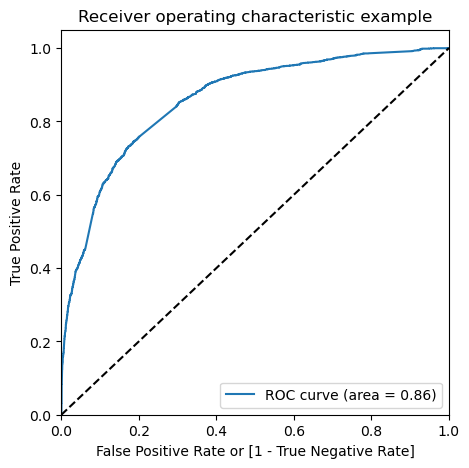

In [1405]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### We are getting a good value of 0.97 indicating a good predictive model.

### Finding Optimal Cutoff Point

In [1406]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.876175,9196,1,1,1,1,1,1,1,1,1,1,0
1,0,0.367257,4696,0,1,1,1,1,0,0,0,0,0,0
2,0,0.317070,3274,0,1,1,1,1,0,0,0,0,0,0
3,0,0.029035,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.507639,1667,1,1,1,1,1,1,1,0,0,0,0


In [1407]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.574438  0.963103  0.335652
0.2   0.2  0.712462  0.915304  0.587841
0.3   0.3  0.745652  0.866667  0.671303
0.4   0.4  0.790969  0.719497  0.834879
0.5   0.5  0.791288  0.653249  0.876095
0.6   0.6  0.784745  0.582390  0.909067
0.7   0.7  0.747726  0.413836  0.952859
0.8   0.8  0.728897  0.326625  0.976043
0.9   0.9  0.693155  0.206709  0.992014


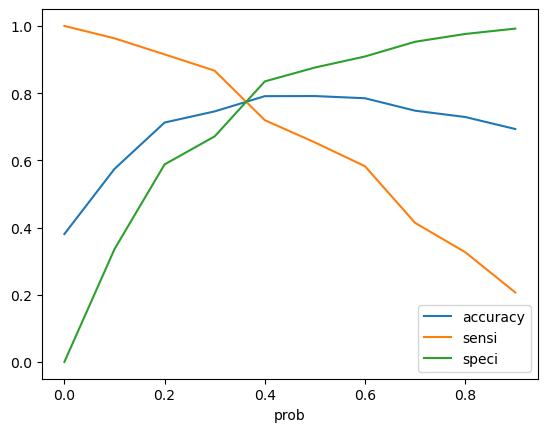

In [1408]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1409]:
#### We see 0.34 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.876175,9196,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.367257,4696,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.317070,3274,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.029035,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.507639,1667,1,1,1,1,1,1,1,0,0,0,0,1


In [1410]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.876175,9196,1,88
1,0,0.367257,4696,1,37
2,0,0.317070,3274,0,32
3,0,0.029035,2164,0,3
4,1,0.507639,1667,1,51


In [1411]:
#Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7837880963778523

In [1412]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3105,  777],
       [ 578, 1807]], dtype=int64)

In [1413]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1414]:
#Sensitivity
TP / float(TP+FN)

0.7576519916142558

In [1415]:
#specificity
TN / float(TN+FP)

0.7998454404945904

##### So we can see that the above model seems to be performing well.
Some observations are: 

Accuracy : 78.37%
Sensitivity : 75.76%
Specificity : 79.98%


In [1416]:
# Calculating False Postive Rate
print(FP/ float(TN+FP))

0.20015455950540958


In [1417]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6993034055727554


In [1418]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8430627206081999


In [1419]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3105,  777],
       [ 578, 1807]], dtype=int64)

In [1420]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6993034055727554

In [1421]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7576519916142558

In [1422]:
from sklearn.metrics import precision_score, recall_score

In [1423]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)


0.6993034055727554

In [1424]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7576519916142558

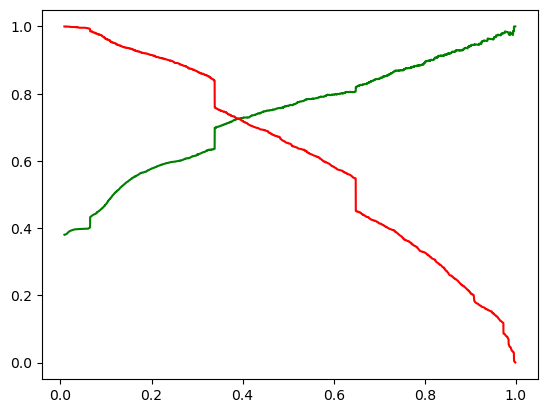

In [1425]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Test data

In [1426]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [1427]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
7681,-0.311318,0,0,1,0,0,0,0,0,0,1
984,-0.550262,0,0,0,0,1,0,0,0,0,1
8135,0.812462,0,0,1,0,0,0,0,0,0,1
6915,-0.628665,0,0,0,1,0,0,0,0,0,0
2712,-0.421456,0,0,0,1,0,0,0,0,0,0


In [1428]:
X_test_sm = sm.add_constant(X_test)

### Predictions on Test data

In [1429]:
y_test_pred = res.predict(X_test_sm)

In [1430]:
y_test_pred[:10]

7681    0.300870
984     0.316267
8135    0.595341
6915    0.115717
2712    0.141004
244     0.229199
4698    0.097657
8287    0.063803
6791    0.349180
8970    0.159221
dtype: float64

In [1431]:
# Converting y_pred to a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7681,0.300870
984,0.316267
8135,0.595341
6915,0.115717
2712,0.141004


In [1432]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1433]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1434]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1435]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1436]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.300870
1,0,984,0.316267
2,0,8135,0.595341
3,0,6915,0.115717
4,1,2712,0.141004


In [1437]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1438]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.300870
1,0,984,0.316267
2,0,8135,0.595341
3,0,6915,0.115717
4,1,2712,0.141004


In [1439]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.300870,30
1,984,0,0.316267,32
2,8135,0,0.595341,60
3,6915,0,0.115717,12
4,2712,1,0.141004,14


In [1440]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.300870,30,0
1,984,0,0.316267,32,0
2,8135,0,0.595341,60,1
3,6915,0,0.115717,12,0
4,2712,1,0.141004,14,0


In [1441]:
#Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7844378257632166

In [1442]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1337,  339],
       [ 240,  770]], dtype=int64)

In [1443]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1444]:
#Sensitivity 
TP / float(TP+FN)

0.7623762376237624

In [1445]:
#Specificity
TN / float(TN+FP)

0.7977326968973747

In [1446]:
#precision_score
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6943192064923355

In [1447]:
#recall_score
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7623762376237624

##### Observations:
Observations on the Test Data after the model is executed

Accuracy : 78.44%

Sensitivity : 76.23%

Specificity : 79.78%

##### Final Observation:

##### Train data observations vs Test data observations

                  Accuracy	    Specificity	  Sensitivity
            
    Train Data  	78.37%	      79.98%	    75.76%

    Test Data	    78.44%	      79.78%	    76.23%


The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model